<a href="https://colab.research.google.com/github/ShivamKum4r/Sentimental-analysis/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
dataset = pd.read_csv('Dataset-SA.csv')
dataset

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
4745,Mivi Fort S16 Soundbar with 2 full range drive...,1499,5,just wow!,over all a nice product,positive
4746,Mivi Fort S16 Soundbar with 2 full range drive...,1499,5,worth every penny,excellent sound quality and connectivity is go...,positive
4747,Mivi Fort S16 Soundbar with 2 full range drive...,1499,4,good choice,super awesome,positive
4748,Mivi Fort S16 Soundbar with 2 full range drive...,1499,4,worth the money,value for money,positive


In [2]:
dataset.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,1


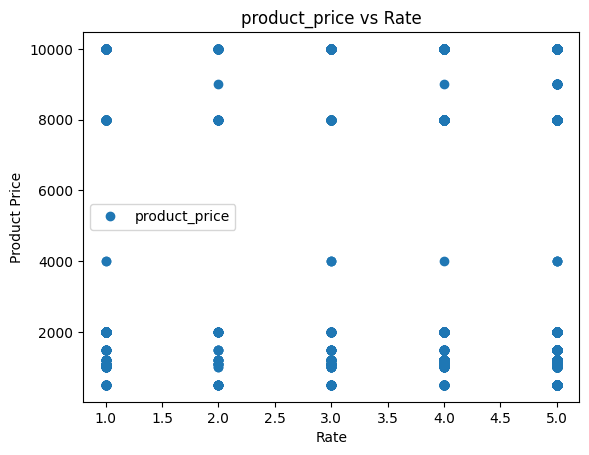

In [3]:
dataset['Rate'] = pd.to_numeric(dataset['Rate'], errors='coerce')
dataset['product_price'] = pd.to_numeric(dataset['product_price'], errors='coerce')
dataset.plot(x='Rate', y='product_price', style='o')
plt.xlabel('Rate')
plt.ylabel('Product Price')
plt.title('product_price vs Rate')
plt.show()

<BarContainer object of 5 artists>

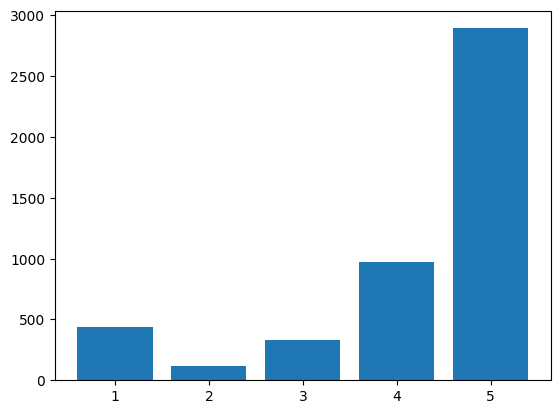

In [4]:
x=[5,4,1,3,2]
plt.bar(x,dataset['Rate'].value_counts())

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
text_data_x = dataset.iloc[:, 2:5]
text_data_y = dataset.iloc[:, -1]

text_x = text_data_x.apply(lambda row: ' '.join(row.values.astype(str)), axis=1).tolist()
# Handle missing values in text_y by filling them with an empty string
text_y = text_data_y.fillna('').tolist()

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(text_x)
y = vectorizer.transform(text_y)
vectorizer_array = x.toarray()
print(vectorizer_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the non-numerical columns
dataset['Review'] = label_encoder.fit_transform(dataset['Review'])
dataset['Summary'] = label_encoder.fit_transform(dataset['Summary'])


imputer = SimpleImputer(strategy='mean') # You can choose a differeif needed
dataset[['Rate', 'Review', 'Summary']] = imputer.fit_transform(dataset[['Rate', 'Review', 'Summary']])


kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset[['Rate', 'Review','Summary']])


KMeans(n_clusters=3)

In [8]:
print(kmeans.cluster_centers_)

[[   4.12610169   61.77694915 1904.45491525]
 [   4.33626857   63.74408365  706.97083104]
 [   4.14951989   62.77434842 3030.42729767]]


[1 1 2 ... 2 2 2]


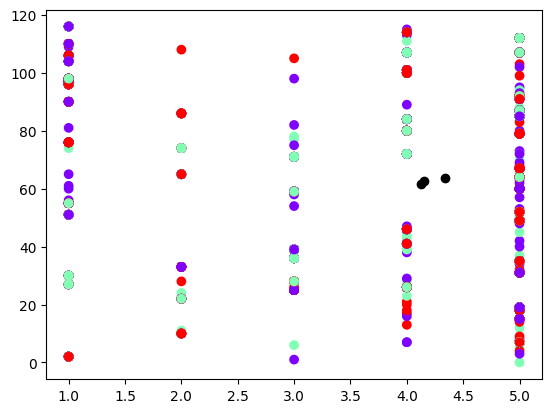

In [9]:
print(kmeans.labels_)
plt.scatter(dataset['Rate'], dataset['Review'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.show()

In [11]:
# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(dataset[['Rate', 'Review', 'Summary']], kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate clustering performance using Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(dataset[['Rate', 'Review', 'Summary']], kmeans.labels_)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: 0.601518813959159
Davies-Bouldin Score: 0.4907860391120946


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features for clustering
features = dataset[['Rate', 'Review', 'Summary']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Apply KMeans to the scaled features
kmeans_scaled = KMeans(n_clusters=3, random_state=42) # Using random_state for reproducibility
kmeans_scaled.fit(scaled_features)

# Evaluate clustering performance using Davies-Bouldin score on scaled features
davies_bouldin_scaled = davies_bouldin_score(scaled_features, kmeans_scaled.labels_)
print(f"Davies-Bouldin Score after scaling: {davies_bouldin_scaled}")

Davies-Bouldin Score after scaling: 1.2854117366533369


In [15]:
dataset['cluster'] = kmeans.labels_
px.scatter_3d(dataset, x='Rate', y='Review', z='Summary', color='cluster')